In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)

In [279]:
df = pd.read_csv('SPACE_wide_2022.csv')

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39766 entries, 0 to 39765
Columns: 224 entries, ID to D3_MT
dtypes: float64(175), int64(47), object(2)
memory usage: 68.0+ MB


In [281]:
# Pagament amb el mòbil POS
df_mobile_2 = df[(df['QA7AII_1'] == 3) | (df['QA7AII_2'] == 3) | (df['QA7AII_3'] == 3) | (df['QA7AII_4'] == 3) | (df['QA7AII_5'] == 3) | (df['QA7AII_6'] == 3) | (df['QA7AII_7'] == 3) | (df['QA7AII_8'] == 3)]

In [282]:
# Pagament amb el mòbil POS
df_mobile = df[(df['QA7A_1'] == 3) | (df['QA7A_2'] == 3) | (df['QA7A_3'] == 3) | (df['QA7A_4'] == 3) | (df['QA7A_5'] == 3) | (df['QA7A_6'] == 3) | (df['QA7A_7'] == 3) | (df['QA7A_8'] == 3)]

In [283]:
# Tipus d'aplicació utilitzada per pagar amb el mòbil
df_mobile[['QA7AII_1', 'QA7AII_2', 'QA7AII_3', 'QA7AII_4', 'QA7AII_5', 'QA7AII_6', 'QA7AII_7', 'QA7AII_8']]

,QA7AII_1,QA7AII_2,QA7AII_3,QA7AII_4,QA7AII_5,QA7AII_6,QA7AII_7,QA7AII_8
18,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
86,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
157,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
39654,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
39677,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
39704,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39721,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
# Create a column with the first available mobile payment application
df_mobile.loc[:, 'mobile_payment_app'] = df_mobile[['QA7AII_1', 'QA7AII_2', 'QA7AII_3', 'QA7AII_4', 'QA7AII_5', 'QA7AII_6', 'QA7AII_7', 'QA7AII_8']].fillna(0).astype(int).astype(str).replace('0', '').agg(','.join, axis=1).str.extract(r'([0-9]{1,2})')[0]
df.loc[:, 'mobile_payment_app'] = df[['QA7AII_1', 'QA7AII_2', 'QA7AII_3', 'QA7AII_4', 'QA7AII_5', 'QA7AII_6', 'QA7AII_7', 'QA7AII_8']].fillna(0).astype(int).astype(str).replace('0', '').agg(','.join, axis=1).str.extract(r'([0-9]{1,2})')[0]

In [285]:
# Map the payment application
mobile_payments_dict = {'3': 'GooglePay',
                        '1': "bank's mobile application",
                        '2': 'ApplePay',
                        '30': 'Android Pay',
                        '4': 'Other',
                        '20': 'Samsung Pay',
                        '40': 'i-bank Pay'}

df_mobile['mobile_payment_app'] = df_mobile['mobile_payment_app'].replace(mobile_payments_dict)
df['mobile_payment_app'] = df['mobile_payment_app'].replace(mobile_payments_dict)

<Axes: ylabel='count'>

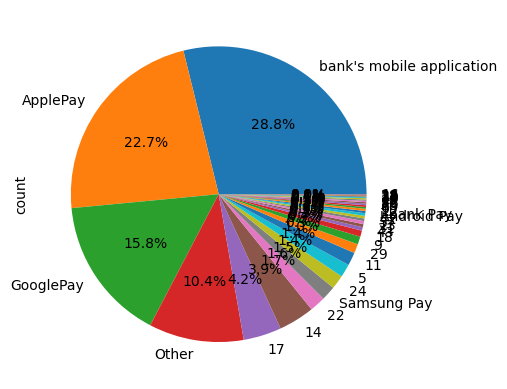

In [286]:
# Graph Mobile Payments by Application
df_mobile['mobile_payment_app'].value_counts().plot.pie(autopct='%1.1f%%')

In [287]:
df_mobile['mobile_payment_app'].value_counts()

mobile_payment_app
bank's mobile application    603
ApplePay                     474
GooglePay                    331
Other                        217
17                            87
14                            82
22                            36
Samsung Pay                   33
24                            32
5                             30
11                            30
29                            21
9                             18
18                            14
43                             8
31                             7
13                             7
37                             6
42                             6
Android Pay                    6
i-bank Pay                     5
12                             5
99                             4
6                              4
25                             4
36                             3
28                             3
27                             3
19                             3
34                      

Most of the users paying in the POS uses GooglePay.
Possible questions:
- Where are they from?

In [288]:
QQ3A_dict = {1: 'Card (debit, credit)',
            2: 'Mobile payments (including wearables like smartwatches)',
            3: 'Bank cheque',
            999999: "Don't know",
            0: "No answer"}

df['QQ3A'] = df['QQ3A'].fillna(0).astype(int).replace(QQ3A_dict)

<Axes: ylabel='count'>

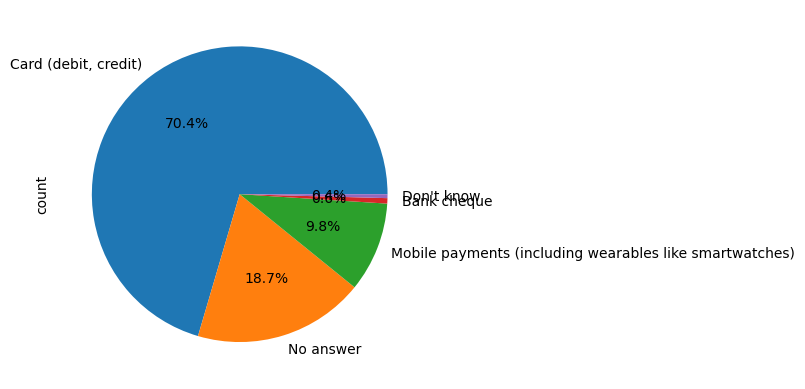

In [289]:
df['QQ3A'].value_counts().plot.pie(autopct='%1.1f%%')

Almost 10% of users would like to use Mobile payments.

- How Many users actually pay with Mobile payments?

In [290]:
df['QQ3A'].value_counts() / df['QQ3A'].value_counts().sum()

QQ3A
Card (debit, credit)                                       0.704496
No answer                                                  0.187095
Mobile payments (including wearables like smartwatches)    0.098250
Bank cheque                                                0.005910
Don't know                                                 0.004250
Name: count, dtype: float64

In [291]:
df_mobile['mobile_payment_app'].info()

<class 'pandas.core.series.Series'>
Index: 2091 entries, 18 to 39726
Series name: mobile_payment_app
Non-Null Count  Dtype 
--------------  ----- 
2091 non-null   object
dtypes: object(1)
memory usage: 32.7+ KB


335 out of 3907 users that wanted to pay by Mobile Applications did it in a POS.
That is less than 10% of them.
It means there is a 90% of users who would like to use Mobile Applications but don't.

- Where are the users that used Mobile Applications from?
- Where are the users that wanted to use Mobile Applications from?

<Axes: xlabel='COUNTRY'>

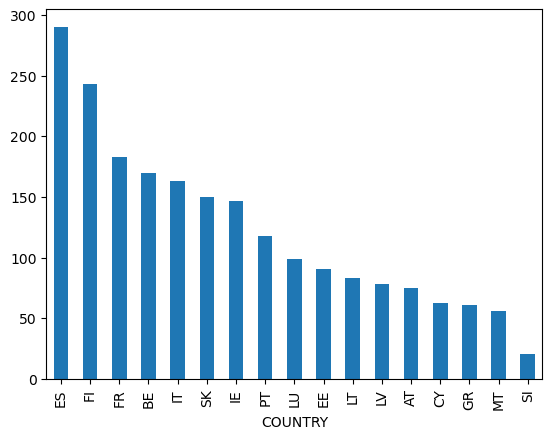

In [292]:
df_mobile['COUNTRY'].value_counts().plot.bar()

<Axes: xlabel='COUNTRY'>

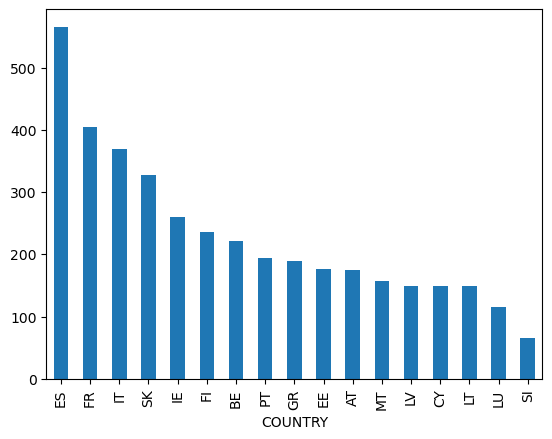

In [293]:
df[df['QQ3A'] == "Mobile payments (including wearables like smartwatches)"]["COUNTRY"].value_counts().plot.bar()

In [294]:
df_mobile_per_country = pd.concat([df_mobile['COUNTRY'].value_counts(), df[df['QQ3A'] == "Mobile payments (including wearables like smartwatches)"]["COUNTRY"].value_counts()], axis=1, )
df_mobile_per_country.columns = ['Used Mobile Applications', 'Want to use Mobile Applications']
df_mobile_per_country.sort_values('Want to use Mobile Applications', ascending=False)

,Used Mobile Applications,Want to use Mobile Applications
COUNTRY,,
ES,290,565
FR,183,405
IT,163,370
SK,150,327
IE,147,260
FI,243,236
BE,170,222
PT,118,195
GR,61,190


In [295]:
df_mobile_per_country = pd.concat([df_mobile['COUNTRY'].value_counts(), df["COUNTRY"].value_counts()], axis=1, )
df_mobile_per_country.columns = ['Used Mobile Applications', 'Total users']
df_mobile_per_country['Percentage'] = (df_mobile_per_country['Used Mobile Applications'] / df_mobile_per_country['Total users']) * 100
df_mobile_per_country.sort_values('Used Mobile Applications', ascending=False)

,Used Mobile Applications,Total users,Percentage
COUNTRY,,,
ES,290,4492,6.455922
FI,243,3024,8.035714
FR,183,6078,3.010859
BE,170,2975,5.714286
IT,163,4483,3.635958
SK,150,2435,6.160164
IE,147,1937,7.589055
PT,118,1988,5.935614
LU,99,1006,9.840954


Show the users that want to use mobile applications vs users that used it. To see the market opportunities.
Thise could be done with a line chart connecting both.

<Axes: xlabel='COUNTRY'>

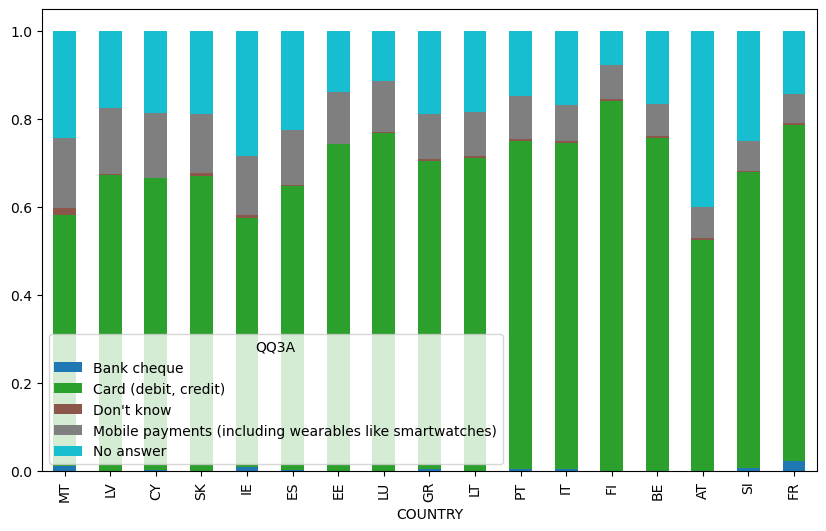

In [296]:
# What users want to pay with per country
cross_tab_prop = pd.crosstab(index=df['COUNTRY'],
                             columns=df['QQ3A'],
                             normalize="index").sort_values('Mobile payments (including wearables like smartwatches)', ascending=False)
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

TODO:
- Investigate by Gender, Age, Education, Urban area.

<Axes: xlabel='AGE_MAP'>

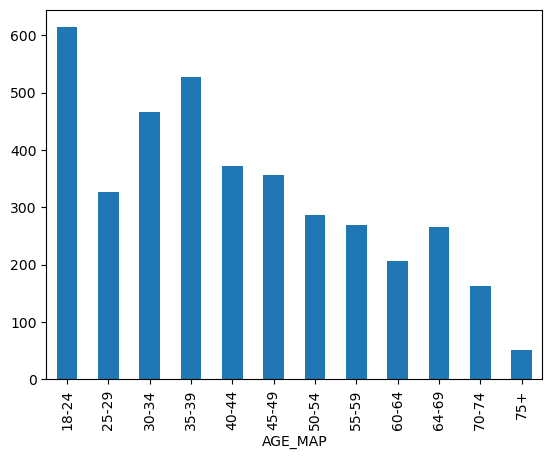

In [297]:
df[df['QQ3A'] == "Mobile payments (including wearables like smartwatches)"]["AGE"]
age_map = {1: "18-24",
    2: "25-29",
    3: "30-34",
    4: "35-39",
    5: "40-44",
    6: "45-49",
    7: "50-54",
    8: "55-59",
    9: "60-64",
    10: "64-69",
    11: "70-74",
    12: "75+"}

df['AGE_MAP'] = df['AGE'].replace(age_map)
df[df['QQ3A'] == "Mobile payments (including wearables like smartwatches)"]["AGE_MAP"].value_counts().sort_index().plot.bar()

In [298]:
df[df['QQ3A'] == "Mobile payments (including wearables like smartwatches)"]["AGE_MAP"].value_counts().sort_index()

AGE_MAP
18-24    614
25-29    327
30-34    467
35-39    528
40-44    372
45-49    357
50-54    286
55-59    270
60-64    207
64-69    265
70-74    162
75+       52
Name: count, dtype: int64

<Axes: xlabel='AGE_MAP'>

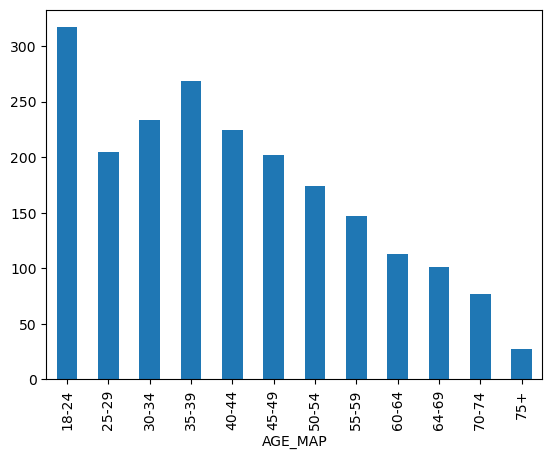

In [299]:
age_map = {1: "18-24",
    2: "25-29",
    3: "30-34",
    4: "35-39",
    5: "40-44",
    6: "45-49",
    7: "50-54",
    8: "55-59",
    9: "60-64",
    10: "64-69",
    11: "70-74",
    12: "75+"}

df_mobile['AGE_MAP'] = df_mobile['AGE'].replace(age_map)
df_mobile["AGE_MAP"].value_counts().sort_index().plot.bar()

In [300]:
df_mobile_per_age = pd.concat([df_mobile['AGE_MAP'].value_counts(), df["AGE_MAP"].value_counts()], axis=1)
df_mobile_per_age.columns = ['Used Mobile Applications', 'Total Users']
df_mobile_per_age['Percentage'] = (df_mobile_per_age['Used Mobile Applications'] / df_mobile_per_age['Total Users']) * 100
df_mobile_per_age.sort_index()

,Used Mobile Applications,Total Users,Percentage
AGE_MAP,,,
18-24,317,3648,8.689693
25-29,205,2379,8.617066
30-34,234,3165,7.393365
35-39,269,4139,6.499154
40-44,225,3312,6.793478
45-49,202,3579,5.644035
50-54,174,3673,4.737272
55-59,147,3490,4.212034
60-64,113,3162,3.573688


In [301]:
df_mobile_per_age = pd.concat([df_mobile[df_mobile['D1'] == 1]['AGE_MAP'].value_counts(),df_mobile[df_mobile['D1'] == 2]['AGE_MAP'].value_counts(), df[df['D1'] == 1]["AGE_MAP"].value_counts(), df[df['D1'] == 2]["AGE_MAP"].value_counts()], axis=1)
df_mobile_per_age.columns = ['Used Mobile Applications men','Used Mobile Applications women' , 'Total men', 'Total women']
df_mobile_per_age['Percentage men'] = (df_mobile_per_age['Used Mobile Applications men'] / df_mobile_per_age['Total men']) * 100
df_mobile_per_age['Percentage women'] = (df_mobile_per_age['Used Mobile Applications women'] / df_mobile_per_age['Total women']) * 100
df_mobile_per_age['Percentage women'].sort_index()

AGE_MAP
18-24    9.208633
25-29    8.169440
30-34    7.142857
35-39    5.547720
40-44    6.100342
45-49    5.005382
50-54    4.594017
55-59    3.863135
60-64    3.828683
64-69    2.233251
70-74    2.205376
75+      1.757188
Name: Percentage women, dtype: float64

<Axes: xlabel='AGE_MAP'>

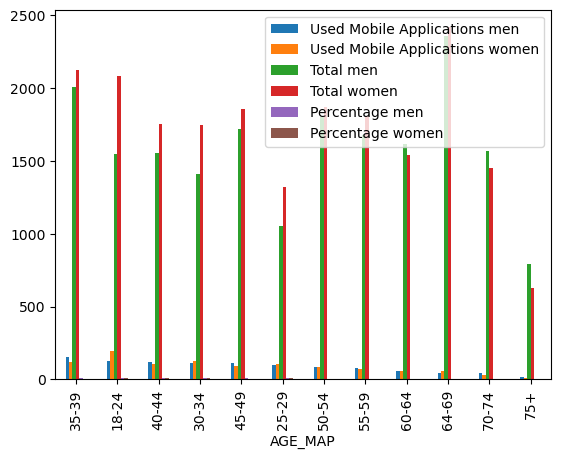

In [302]:
df_mobile_per_age.plot.bar()

Market opportunities of people wanting to use Mobile Applications per Age.
The younger the higher the market for Mobile Applications methods of payments.

In [303]:
education_map = {1: "Primary/lower secondary education",
    2: "Upper/post-secondary education",
    3: "University/PhD/research",
    999998: "Refusal / No answer"}

df_mobile['EDUCATION_MAP'] = df_mobile['EDUCATION'].replace(education_map)
df['EDUCATION_MAP'] = df['EDUCATION'].replace(education_map)

df_mobile_per_education = pd.concat([df_mobile['EDUCATION_MAP'].value_counts(), df["EDUCATION_MAP"].value_counts()], axis=1)
df_mobile_per_education.columns = ['Used Mobile Applications', 'Total Users']

df_mobile_per_education['Percentage'] = (df_mobile_per_education['Used Mobile Applications'] / df_mobile_per_education['Total Users']) * 100
df_mobile_per_education.sort_values('Used Mobile Applications')

,Used Mobile Applications,Total Users,Percentage
EDUCATION_MAP,,,
Refusal / No answer,1,8,12.500000
Primary/lower secondary education,264,7001,3.770890
Upper/post-secondary education,876,17609,4.974729
University/PhD/research,950,15148,6.271455


In [304]:
df_mobile_per_education = pd.concat([df[df['QQ3A'] == "Mobile payments (including wearables like smartwatches)"]['EDUCATION_MAP'].value_counts(), df["EDUCATION_MAP"].value_counts()], axis=1)
df_mobile_per_education.columns = ['Want to use Mobile Applications', 'Total Users']

df_mobile_per_education['Percentage'] = (df_mobile_per_education['Want to use Mobile Applications'] / df_mobile_per_education['Total Users']) * 100
df_mobile_per_education.sort_values('Want to use Mobile Applications')

,Want to use Mobile Applications,Total Users,Percentage
EDUCATION_MAP,,,
Refusal / No answer,1,8,12.500000
Primary/lower secondary education,656,7001,9.370090
University/PhD/research,1598,15148,10.549247
Upper/post-secondary education,1652,17609,9.381566
